# Dynamic Programming

# 1. 两个常遇见的问题：数组压平和去除重复值

# 2. Python 装饰器的使用

In [1]:
import time

In [2]:
def func_1(n):
    for i in range(n):
        print(i)

In [3]:
def call_time(func,arg):# 脚手架程序
    #函数作为参数传递。Python是面向函数设计 ->概念 可赋值，可返回，作为变量传递
    start=time.time()
    func(arg)
    print ("used time :{}".format(time.time()-start))

In [4]:
def get_call_time(func):
    def _wrap(arg): ## *args,支持变长参数，**kwargs
        start=time.time()
        result=func(arg)
        print('used time :{}'.format(time.time()-start))
        return result
    return _wrap

In [5]:
call_time(func_1,10)

0
1
2
3
4
5
6
7
8
9
used time :0.0010001659393310547


In [6]:
func_1=get_call_time(func_1)  # =>@(decorator)  装饰器

In [7]:
func_1(10)

0
1
2
3
4
5
6
7
8
9
used time :0.0009961128234863281


func_slow=get_call_time(func_slow)  # =>@(decorator)  装饰器

In [8]:
@get_call_time
def func_slow(n):
    start=time.time()
    for i in range(n):
        time.sleep(0.001)
        print (i)
#    print ("used time :{}".format(time.time()-start))

In [9]:
func_slow(10)

0
1
2
3
4
5
6
7
8
9
used time :0.016986608505249023


In [10]:
from functools import wraps

加上wraps后可以保留被装饰前函数的信息

In [11]:
def my_decorator(func): 
#    @wraps(func)
    def wrapper(*args, **kwargs):       
        '''decorator'''        
        print('Calling decorated function...')        
        return func(*args, **kwargs)    
    return wrapper  


In [12]:
@my_decorator
def func_2():
    """
    @ describe the function 
    """
    print('Called example function')

被装饰后的函数替代原函数信息（函数名等函数属性会发生改变）

In [13]:
print(func_2.__name__, func_2.__doc__)

wrapper decorator


如果被封装到装饰器里，help会输出装饰器的信息

In [14]:
help(func_2)

Help on function wrapper in module __main__:

wrapper(*args, **kwargs)
    decorator



# 3. 动态规划

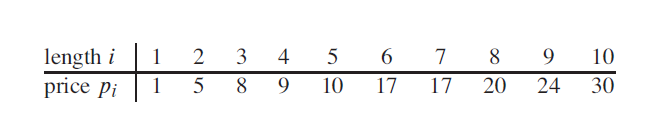

In [15]:
original_price=[1,5,8,9,10,17,17,20,24,30]

In [16]:
from collections import defaultdict

In [17]:
price =defaultdict(int)

In [18]:
for i,p in enumerate (original_price):
    price[i+1]=p

In [19]:
assert price[1]==1

In [20]:
price[9]

24

In [21]:
solution={}
# for a given length N,we set the corresponding split parts
# exp   4:(2,2)
#

In [22]:
def r(n):
    return max(
       # [p[n],r[1]+r[n-1],r[2]+r[n-2],...r[n-1]+r[1]] 
        [price[n]]+[(r(i)+r(n-i)) for i in range(1,n)]
    )

#### r(12) #如果N很大，就会运行的很慢 :估算时间复杂度 f(n)=f(n-1)...+f(2)+f(1) => n*f(n-1)  N的阶乘 非多项式

In [23]:
r(10)

30

#### 提供solution

In [24]:
 def r_s(n):
    max_price,split_point = max(
       # [p[n],r[1]+r[n-1],r[2]+r[n-2],...r[n-1]+r[1]] 
        [(price[n],0)]+[(r(i)+r(n-i),i) for i in range(1,n)], key=lambda x:x[0]
    )
    solution[n]=(split_point, n-split_point)
    return max_price

In [25]:
r_s(8)

22

In [26]:
solution[8]

(2, 6)

### 解决计算速度问题

In [27]:
solution={}

In [28]:
#i=0
def memo(func):  
    cache = {}
    print ("this is a decorator named memo")
#    @wraps(func)
#   i=0 #如何将装饰器内部的变量作为global传递给调用函数？
    def _wrap(n,i=0): ## ? *args, **kwargs
        i+=1
#        print ("call times:{}".format(i))
#        print (func.__name__)
        if n in cache: 
            result = cache[n]
        else:
            result = func(n) #迭代时func时_wrap 还是 r_opti? 
            cache[n] = result
#       print (cache)
        return result
    return _wrap

如何在前面已定义的函数加装饰器？

In [29]:
@memo
def r_opti(n):
    max_price, split_point = max(    
        [(price[n], 0)] + [(r_opti(i) + r_opti(n-i), i) for i in range(1, n)], key=lambda x: x[0]
    )
    solution[n]=(split_point, n-split_point)
    return max_price

this is a decorator named memo


r(16)

In [30]:
print(r_opti.__name__)

_wrap


In [31]:
r_opti(2)

5

In [32]:
r_opti(320)

960

In [33]:
solution

{1: (0, 1),
 2: (0, 2),
 3: (0, 3),
 4: (2, 2),
 5: (2, 3),
 6: (0, 6),
 7: (1, 6),
 8: (2, 6),
 9: (3, 6),
 10: (0, 10),
 11: (1, 10),
 12: (2, 10),
 13: (3, 10),
 14: (2, 12),
 15: (2, 13),
 16: (6, 10),
 17: (1, 16),
 18: (2, 16),
 19: (3, 16),
 20: (10, 10),
 21: (1, 20),
 22: (2, 20),
 23: (3, 20),
 24: (2, 22),
 25: (2, 23),
 26: (6, 20),
 27: (1, 26),
 28: (2, 26),
 29: (3, 26),
 30: (10, 20),
 31: (1, 30),
 32: (2, 30),
 33: (3, 30),
 34: (2, 32),
 35: (2, 33),
 36: (6, 30),
 37: (1, 36),
 38: (2, 36),
 39: (3, 36),
 40: (10, 30),
 41: (1, 40),
 42: (2, 40),
 43: (3, 40),
 44: (2, 42),
 45: (2, 43),
 46: (6, 40),
 47: (1, 46),
 48: (2, 46),
 49: (3, 46),
 50: (10, 40),
 51: (1, 50),
 52: (2, 50),
 53: (3, 50),
 54: (2, 52),
 55: (2, 53),
 56: (6, 50),
 57: (1, 56),
 58: (2, 56),
 59: (3, 56),
 60: (10, 50),
 61: (1, 60),
 62: (2, 60),
 63: (3, 60),
 64: (2, 62),
 65: (2, 63),
 66: (6, 60),
 67: (1, 66),
 68: (2, 66),
 69: (3, 66),
 70: (10, 60),
 71: (1, 70),
 72: (2, 70),
 73:

###  Over lapping 如果子问题有重复，就是动态规划问题？？
### dynamic programing 三步骤： 分析子问题的重复；把子问题的结果存储起来（用装饰器方法）；构建solution(递归)

In [34]:
def not_cut(split):return split==0

In [35]:
def parse_solution(target_length, revenue_solution):
    #递归出口
    left,right =revenue_solution[target_length]
    #if target_length in revenue_solution and revenue_solution[target_length][0]==0
    if not_cut(left):return [right]
    # return [parse_solution(left，revenue_solution)]+ [parse_solution(right,revenue_solution=)] #注意返回时拆分的列表 避免直接值数量不一致
    return parse_solution(left,revenue_solution)+ parse_solution(right,revenue_solution)

In [36]:
parse_solution(29,solution)

[3, 6, 10, 10]

再复习下课上提到的solution 解析的用法。为什么要显示所有的过程呢？

# 分析： 采用搜索的方法和函数拟合的办法的比较

机器学习获得是最大的概率解

# 4. 最小编辑距离

搜狗输入法的改进： 1.边界距离 2.概率模型 

In [37]:
from functools import lru_cache  

In [53]:
solution={}

In [54]:
@lru_cache(maxsize=2**10)
def edit_dist (str1,str2):
    if len(str1)==0: return len(str2)
    if len(str2)==0: return len(str1)
    
    tail_s1=str1[-1]
    tail_s2=str2[-1]
  # 类似于二叉树的前序遍历
    candidates=[
        (edit_dist(str1[:-1],str2)+1, 'ADD {}'.format(tail_s1)), #add word1 last charactor to str2
        (edit_dist(str1,str2[:-1])+1, 'DEL {}'.format(tail_s2)), #delete word 2 last charactor
    ]
        
    if tail_s1==tail_s2:
        both_forward=(edit_dist(str1[:-1],str2[:-1])+0,'')    
 #       print (min_dist)
 #       return min_dist
    else : 
        both_forward=(edit_dist(str1[:-1],str2[:-1])+1,'SUB {} => {}'.format(tail_s1, tail_s2)) 
        """    
        if len(str1)>len(str2):
            return edit_dist(str1[:-1],str2)+1
        elif len(str1)<len(str2):
            return edit_dist(str1,str2[:-1])+1
        else :
            return edit_dist(str1[:-1],str2[-1]+1)
            
        """ 
       
    candidates.append(both_forward)
    min_dist,operation=min(candidates,key=lambda x: x[0])
    
    solution[(str1, str2)] = [operation]
 
    return min_dist
        
            

In [55]:
edit_dist('ABCDE', 'ABCCEFD')wosh

3

In [56]:
solution

{('A', 'A'): [''],
 ('A', 'AB'): ['DEL B'],
 ('A', 'ABC'): ['DEL C'],
 ('A', 'ABCC'): ['DEL C'],
 ('A', 'ABCCE'): ['DEL E'],
 ('A', 'ABCCEF'): ['DEL F'],
 ('A', 'ABCCEFD'): ['DEL D'],
 ('AB', 'A'): ['ADD B'],
 ('AB', 'AB'): [''],
 ('AB', 'ABC'): ['DEL C'],
 ('AB', 'ABCC'): ['DEL C'],
 ('AB', 'ABCCE'): ['DEL E'],
 ('AB', 'ABCCEF'): ['DEL F'],
 ('AB', 'ABCCEFD'): ['DEL D'],
 ('ABC', 'A'): ['ADD C'],
 ('ABC', 'AB'): ['ADD C'],
 ('ABC', 'ABC'): [''],
 ('ABC', 'ABCC'): ['DEL C'],
 ('ABC', 'ABCCE'): ['DEL E'],
 ('ABC', 'ABCCEF'): ['DEL F'],
 ('ABC', 'ABCCEFD'): ['DEL D'],
 ('ABCD', 'A'): ['ADD D'],
 ('ABCD', 'AB'): ['ADD D'],
 ('ABCD', 'ABC'): ['ADD D'],
 ('ABCD', 'ABCC'): ['SUB D => C'],
 ('ABCD', 'ABCCE'): ['DEL E'],
 ('ABCD', 'ABCCEF'): ['DEL F'],
 ('ABCD', 'ABCCEFD'): [''],
 ('ABCDE', 'A'): ['ADD E'],
 ('ABCDE', 'AB'): ['ADD E'],
 ('ABCDE', 'ABC'): ['ADD E'],
 ('ABCDE', 'ABCC'): ['ADD E'],
 ('ABCDE', 'ABCCE'): [''],
 ('ABCDE', 'ABCCEF'): ['DEL F'],
 ('ABCDE', 'ABCCEFD'): ['DEL D']}

In [95]:
def parse_solution(target_str1,target_str2,revenue_solution):
    
    
    if target_str1==target_str2:
        return [];
    
    if len(target_str1)>len(target_str2): 
        return revenue_solution[(target_str1,target_str2)]+parse_solution(target_str1[:-1],target_str2,revenue_solution)
    elif len(target_str1)<len(target_str2): 
        return revenue_solution[(target_str1,target_str2)]+parse_solution(target_str1,target_str2[:-1],revenue_solution)
    else:
        print (target_str1,target_str2)
        if revenue_solution[(target_str1,target_str2)]!=['']:
            print('2')  
            return revenue_solution[(target_str1,target_str2)]+parse_solution(target_str1[:-1],target_str2[:-1],revenue_solution)          
        else :
            return parse_solution(target_str1[:-1],target_str2[:-1],revenue_solution)


In [97]:
parse_solution('ABCDE','ABCCEF',solution)

ABCDE ABCCE
ABCD ABCC
2


['DEL F', 'SUB D => C']

In [98]:
edit_dist('我最喜欢小猪佩奇', '我最喜欢小猪奇奇')

1

In [100]:
parse_solution('我最喜欢小猪佩奇','我最喜欢小猪奇奇',solution)

我最喜欢小猪佩奇 我最喜欢小猪奇奇
我最喜欢小猪佩 我最喜欢小猪奇
2


['SUB 佩 => 奇']